In [1]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Devansh\Desktop\Devansh\NMIMS\Machine Learning\Notebooks


In [4]:
df = pd.read_csv('C:/Users/Devansh/Desktop/Devansh/NMIMS/Machine Learning/Kaggle Datasets/car_evaluation.csv', header = None)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
for i in col_names:
    print(df[i].value_counts())

med      432
low      432
vhigh    432
high     432
Name: buying, dtype: int64
med      432
low      432
vhigh    432
high     432
Name: maint, dtype: int64
5more    432
4        432
2        432
3        432
Name: doors, dtype: int64
more    576
4       576
2       576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [12]:
df.shape

(1728, 7)

In [13]:
X = df.drop(['class'],axis = 1)
y = df['class']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_train = enc.fit_transform(X_train)
X_test = enc.transform((X_test))

## Gini index as criterion

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
y_pred = clf_gini.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

print(f'Model with gini index gives an accuracy of: {accuracy_score(y_test, y_pred)}')

Model with gini index gives an accuracy of: 0.7572254335260116


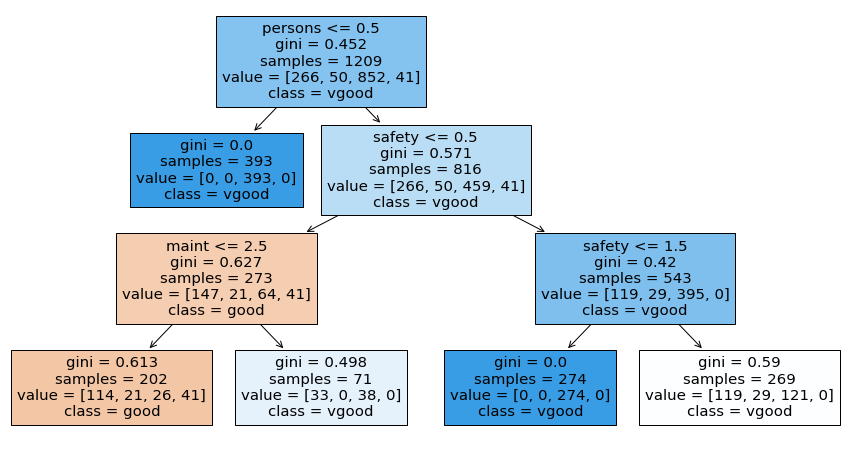

In [26]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(clf_gini,
               feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
               class_names= list(set(y_train)),
               filled = True)
plt.show()

In [28]:
# Check for underfitting

print(f'Training set score: {clf_gini.score(X_train,y_train)}')
print(f'Test set score: {clf_gini.score(X_test,y_test)}')

Training set score: 0.7775020678246485
Test set score: 0.7572254335260116


## Entropy as criterion

In [66]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [67]:
y_pred = clf_entropy.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score

print(f'Model with gini index gives an accuracy of: {accuracy_score(y_test, y_pred)}')

Model with gini index gives an accuracy of: 0.7572254335260116


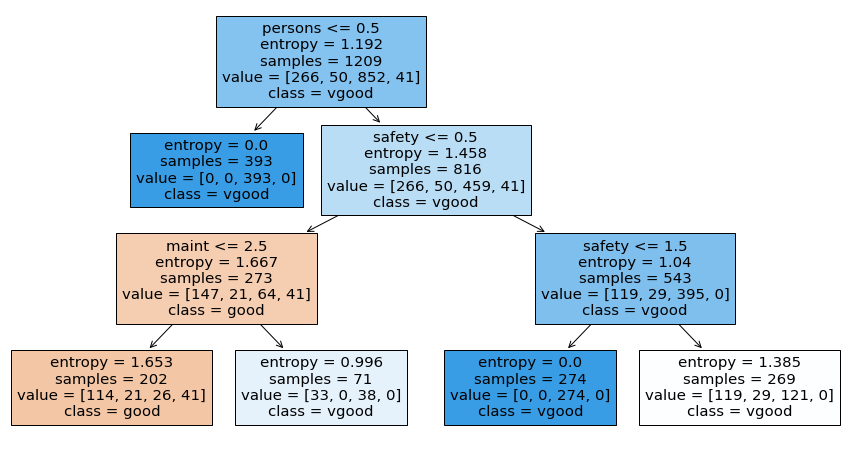

In [69]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf_entropy,
               feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
               class_names= list(set(y_train)),
               filled = True)
plt.show()

In [70]:
# Check for underfitting

print(f'Training set score: {clf_entropy.score(X_train,y_train)}')
print(f'Test set score: {clf_entropy.score(X_test,y_test)}')

Training set score: 0.7775020678246485
Test set score: 0.7572254335260116


In [71]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

In [72]:
print(cm)

[[ 44   0  74   0]
 [  9   0  10   0]
 [  9   0 349   0]
 [ 24   0   0   0]]


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.51      0.37      0.43       118
        good       0.00      0.00      0.00        19
       unacc       0.81      0.97      0.88       358
       vgood       0.00      0.00      0.00        24

    accuracy                           0.76       519
   macro avg       0.33      0.34      0.33       519
weighted avg       0.67      0.76      0.71       519



C:\Users\Devansh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devansh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devansh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
